# 🌍 Exploratory Data Analysis (EDA) - World Happiness Report

## 📝 Introduction
Exploratory Data Analysis (EDA) is a fundamental process in any data science project, enabling us to understand the data's structure, relationships, and patterns before proceeding to more advanced analysis or modeling.

In this project, we will work with the World Happiness Report dataset, specifically focusing on the years 2015 to 2019. This dataset provides insights into how various factors influence the happiness levels of countries worldwide.

## 🎯 Objectives of the EDA

- **🛠️ Data Transformation:** Combine data from multiple years into a unified DataFrame for comprehensive analysis.
- **🧹 Data Cleaning:** Clean the dataset by handling missing values, correcting inconsistencies, and preparing it for further analysis.
- **📊 Understanding Data Distribution:** Explore the distribution of variables to gain insights into the dataset's characteristics, identify outliers, and understand the nature of the data.
- **🔄 Feature Engineering:** Prepare and engineer features to enhance the dataset's predictive power and to build a robust model.
- **📈 Model Development:** Identify and implement a suitable model that fits the data and provides accurate insights into the factors influencing global happiness.

## 🌟 Context
The World Happiness Report is a renowned survey that evaluates global happiness. The report has gained prominence since its first publication in 2012, providing insights into the well-being of nations. Governments, organizations, and policymakers use these happiness indicators to inform decisions and strategies.

The dataset leverages data from the Gallup World Poll, focusing on the Cantril ladder, where respondents rate their lives from 0 (worst possible) to 10 (best possible). Several factors such as economic production, social support, life expectancy, and freedom are analyzed to understand their contribution to national happiness.

Let's dive into the analysis and explore what factors contribute to happiness on a global scale!


### Set Workdir

In [370]:
import os
import sys

work_dir = os.getenv("WORK_DIR")

sys.path.append(work_dir)


### 🔍 Data Loading and Initial Exploration

To begin our analysis, we will load the necessary libraries and explore the dataset. The data is divided into multiple CSV files, each corresponding to a different year (from 2015 to 2019). Our first step will be to read and consolidate these files into a single DataFrame, enabling a comprehensive analysis across all the available years.

By merging these datasets, we aim to ensure consistency in the data format and structure, which will allow us to conduct a more efficient and thorough exploration of trends and patterns.

In [371]:
# Important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil

# Train split
from sklearn.model_selection import train_test_split

# Regresion Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import statsmodels.formula.api as smf


# Metrics
from sklearn.metrics import r2_score, mean_squared_error

# Save Best Model
import joblib



### 📂 Reading Yearly Data

In this step, we're reading the data files for each year from 2015 to 2019. The dataset for each year is stored in a separate CSV file, so we use a loop to iterate through the years, loading each file into a separate DataFrame. 

We store each yearly DataFrame in a dictionary called `dfs`, using the year as the key. This approach makes it easier to manage and access individual datasets before merging them into a single comprehensive DataFrame for our analysis.

In [372]:
dfs = {}
for year in range(2015,2020):
    df = pd.read_csv(f"../data/{year}.csv")
    dfs[year] = df



In this step, we're inspecting the structure of each yearly dataset by printing out the column names. This helps us understand the variations in the dataset across different years, as each CSV file might have slightly different column names or formats. 


In [373]:
for year, data in dfs.items():
    print(f"year: {year}")
    print("Columns:", list(data.columns))
    print() 


year: 2015
Columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

year: 2016
Columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

year: 2017
Columns: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']

year: 2018
Columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

year: 2019
Columns: ['

The output reveals some differences in the column names across the datasets:

- **2015 and 2016:** Both years have similar columns, but 2016 includes additional columns like 'Lower Confidence Interval' and 'Upper Confidence Interval'.
- **2017:** The column names have slight variations in formatting, such as dots instead of spaces (e.g., 'Happiness.Score' instead of 'Happiness Score').
- **2018 and 2019:** These years have a different structure, using columns like 'Overall rank', 'Country or region', and 'Score' instead of 'Happiness Rank' and 'Happiness Score'. 


### 🧹 Removing Unnecessary Columns

In this first step of the transformation process, we're removing columns that are not essential for our analysis. These columns do not appear consistently across all datasets, so dropping them helps to create a uniform structure:

- **2015 dataset:** Removed 'Standard Error'.
- **2016 dataset:** Removed 'Upper Confidence Interval' and 'Lower Confidence Interval'.
- **2017 dataset:** Removed 'Whisker.high' and 'Whisker.low'.

By eliminating these columns, we are ensuring that all datasets have a consistent set of key variables for the subsequent merging process.


In [374]:
dfs[2015].drop(columns=['Standard Error'], inplace=True)

dfs[2016].drop(columns=['Upper Confidence Interval', 'Lower Confidence Interval'], inplace=True)

dfs[2017].drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)


### 🌍 Adding 'Region' Information to Datasets

The second step involves standardizing the `Region` information across datasets. Only the 2015 dataset contains a 'Region' column, so we are creating a mapping of countries to their regions using the 2015 data. Then, we apply this mapping to the datasets from 2017, 2018, and 2019:

- **Created a dictionary** from the 2015 dataset that maps each country to its corresponding region.
- **2017, 2018, and 2019 datasets:** Used this mapping to add a 'Region' column.

This step ensures that we have consistent 'Region' data for all years, which is crucial for any regional analysis of happiness scores.


In [375]:
country_region_dict = dict(zip(dfs[2015]['Country'], dfs[2015]['Region']))

dfs[2017]['Region'] = dfs[2017]['Country'].map(country_region_dict)
dfs[2018]['Region'] = dfs[2018]['Country or region'].map(country_region_dict)
dfs[2019]['Region'] = dfs[2019]['Country or region'].map(country_region_dict)


### 📉 Dropping Rank Columns

The third transformation step involves removing the columns related to the ranking of countries. Although the rank can be insightful, it is not directly comparable across years due to differences in the number of countries surveyed and ranking criteria. Therefore, we drop the following columns:

- **2015 dataset:** 'Happiness Rank'.
- **2016 dataset:** 'Happiness Rank'.
- **2017 dataset:** 'Happiness.Rank'.
- **2018 and 2019 datasets:** 'Overall rank'.

This streamlines our dataset, allowing us to focus on numerical and categorical data that are consistent over time.


In [376]:
dfs[2015].drop(columns=['Happiness Rank'], inplace=True)
dfs[2016].drop(columns=['Happiness Rank'], inplace=True)
dfs[2017].drop(columns=['Happiness.Rank'], inplace=True)
dfs[2018].drop(columns=['Overall rank'], inplace=True)
dfs[2019].drop(columns=['Overall rank'], inplace=True)


### ✏️ Renaming Columns for Consistency

In the final transformation step, we rename columns in the datasets from 2017, 2018, and 2019 to match the naming conventions used in the 2015 and 2016 datasets. This is necessary because column names vary slightly between years due to different formats. Here's a summary of the changes:

- **2017 dataset:** Standardized names such as 'Happiness.Score' to 'Happiness Score' and 'Economy..GDP.per.Capita.' to 'Economy (GDP per Capita)'.
- **2018 and 2019 datasets:** Columns like 'Country or region' were renamed to 'Country', and 'Score' was standardized to 'Happiness Score'. Other key variables like GDP, social support, and health were aligned to a consistent naming format.

By ensuring that the column names are consistent, we facilitate the merging of data into a unified DataFrame for analysis.


In [377]:

dfs[2017].rename(columns={
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Dystopia.Residual': 'Dystopia Residual'
}, inplace=True)

dfs[2018].rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)'
}, inplace=True)

dfs[2019].rename(columns={
    'Country or region': 'Country',
    'Score': 'Happiness Score',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Trust (Government Corruption)'
}, inplace=True)



### 📊 Combining Data from Multiple Years

Now that all the datasets have consistent structures, we proceed to merge them into a single DataFrame for comprehensive analysis. Here's a breakdown of the process:

1. **Creating a List of Years:** We define a list of years from 2015 to 2019, which represent the datasets we have standardized.
  
2. **Adding a 'Year' Column:** For each dataset, we create a copy and add a new column called 'year' to indicate the year associated with each record. This ensures we can easily filter and analyze the data by year in the future.

3. **Combining Datasets:** We use the `pd.concat()` function to concatenate all the yearly datasets into one unified DataFrame. This combined DataFrame allows us to explore trends over time without switching between individual datasets.

4. **Result Preview:** Finally, we display the first few rows of the combined DataFrame using `df.head()` to verify that the data has been correctly merged and the 'year' column is present.

By consolidating the datasets, we now have a comprehensive view of the happiness data from 2015 to 2019, making it easier to conduct cross-year analyses.


In [378]:

years = [2015, 2016, 2017, 2018, 2019]


dfs_combined = []

for year in years:
   
    df_with_year = dfs[year].copy()  
    df_with_year['year'] = year  
    dfs_combined.append(df_with_year)  


df = pd.concat(dfs_combined, ignore_index=True)


df.head()  

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


### 📈 Understanding Data Distribution

To gain insights into the distribution of our dataset, we have defined a function called `statistic_count(num)`. This function computes various statistical metrics for a given numeric column in our DataFrame. Here's a breakdown of its components:

1. **Descriptive Statistics:** The function uses the `describe()` method to generate a summary of statistics for the numeric column, which includes metrics such as count, mean, standard deviation, minimum, maximum, and the quartiles.

2. **Adding the Median:** We calculate the median of the numeric column using the `median()` method and add it to the summary statistics. The median provides a central value that helps to understand the distribution of the data, especially in the presence of outliers.

3. **Rearranging Columns:** The resulting DataFrame of statistics is rearranged to present the metrics in a more interpretable order. The columns included are: 
   - Count
   - Mean
   - Median
   - Minimum
   - Maximum
   - Standard deviation
   - 25th percentile (Q1)
   - 75th percentile (Q3)

4. **Returning the Result:** Finally, the function returns the reformatted DataFrame, which can be used to analyze the distribution of values in the specified numeric column.

By applying this function to our dataset, we will better understand the characteristics of the data, including its central tendency, dispersion, and potential outliers.


In [379]:
def statistic_count(num):

    statistic = num.describe().T
    statistic['median'] = num.median()
    statistic = statistic.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(statistic)

In [380]:
numerical = df.select_dtypes('number')

statistic_count(numerical)

,count,mean,median,std,min,25%,50%,75%,max
Happiness Score,782.0,5.379018,5.322000,1.127456,2.69300,4.509750,5.322000,6.189500,7.769000
Economy (GDP per Capita),782.0,0.916047,0.982205,0.407340,0.00000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,1.124735,0.329548,0.00000,0.869363,1.124735,1.327250,1.644000
Health (Life Expectancy),782.0,0.612416,0.647310,0.248309,0.00000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.431000,0.152880,0.00000,0.309768,0.431000,0.531000,0.724000
Trust (Government Corruption),781.0,0.125436,0.091000,0.105816,0.00000,0.054000,0.091000,0.156030,0.551910
Generosity,782.0,0.218576,0.201982,0.122321,0.00000,0.130000,0.201982,0.278832,0.838075
Dystopia Residual,470.0,2.092717,2.094640,0.565772,0.32858,1.737975,2.094640,2.455575,3.837720
year,782.0,2016.993606,2017.000000,1.417364,2015.00000,2016.000000,2017.000000,2018.000000,2019.000000


### 📊 Interpretation of Key Variables

**Happiness Score:** The Happiness Score has a mean of 5.38 and a median of 5.32, indicating a relatively symmetrical distribution. The standard deviation of 1.13 suggests variability in happiness levels across countries. Scores range from a low of 2.69 to a high of 7.77, highlighting the existence of both very unhappy and exceptionally happy nations.

**Economy (GDP per Capita):** With a mean of 0.92 and a median of 0.98, the Economy (GDP per Capita) shows a slight skewness, suggesting that many countries experience higher economic performance. The standard deviation of 0.41 points to significant disparities in GDP per capita, with some nations showing very low values while others exhibit much higher levels.

**Health (Life Expectancy):** The mean score for Health (Life Expectancy) is 0.61, with a median of 0.65. This moderate distribution shows that most countries have relatively high life expectancy scores, although some countries contribute to lower average scores. The standard deviation of 0.25 indicates variability in health outcomes worldwide.

**Trust (Government Corruption):** Trust in government is notably low, with a mean of 0.13 and a median of 0.09. This indicates a general lack of confidence in governmental institutions. The standard deviation of 0.11 reveals some variability, with a few countries reporting significantly higher levels of trust compared to the average.


### 📝 Data Summary

To gain insights into the dataset, we created a summary DataFrame that provides essential information about each variable. The summary includes the following details:

- **Data Types:** This indicates the type of data stored in each column, helping to understand the nature of the variables (e.g., numerical, categorical).
- **Null Count:** This shows the number of missing values for each variable, which is crucial for identifying potential data quality issues that may need to be addressed before analysis.
- **Duplicate Count:** This reflects how many duplicate entries exist in the dataset, which is important for ensuring data integrity and accuracy.
- **Unique Values:** This indicates the number of unique entries in each variable, offering insight into the diversity and variability within the dataset.

The summary can be visualized in the following DataFrame:

In [381]:
summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'duplicate count': df.duplicated().sum(),
    'unique values': df.nunique()
})
summary

,dtypes,null count,duplicate count,unique values
Country,object,0,0,170
Region,object,19,0,10
Happiness Score,float64,0,0,716
Economy (GDP per Capita),float64,0,0,742
Family,float64,0,0,732
Health (Life Expectancy),float64,0,0,705
Freedom,float64,0,0,697
Trust (Government Corruption),float64,1,0,635
Generosity,float64,0,0,664
Dystopia Residual,float64,312,0,470


### 🌍 Manual Region Assignment

As observed, there were some regions with missing values in the dataset. To address this issue, we created a mapping of countries to their respective regions. Using this mapping, we filled in the missing region values by mapping the countries that were previously unassigned.

This manual assignment ensures that all countries are categorized within the appropriate regions, thus enhancing the completeness of the dataset for further analysis.


In [382]:
region_mapping = {
    'Taiwan Province of China': 'Eastern Asia',
    'Belize': 'Latin America and Caribbean',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Somalia': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'United Arab Emirates': 'Middle East and Northern Africa',
    'Trinidad & Tobago': 'Latin America and Caribbean',
    'Northern Cyprus': 'Eastern Europe',
    'North Macedonia': 'Central and Eastern Europe',
    'Gambia': 'Sub-Saharan Africa'
}

df['Region'] = df['Region'].fillna(df['Country'].map(region_mapping))

### 🌐 Normalization of Regions

Given the numerous categories present in the dataset, we employed a normalization process to simplify these values into broader continental classifications. By mapping the existing regions to their corresponding continents, we reduced the complexity of the dataset while maintaining meaningful geographical groupings.

This normalization helps in streamlining the analysis and comparison of happiness scores across different regions, making it easier to derive insights based on continental trends.


In [383]:
normalization_regions = {
    'Western Europe': 'West_Europe',
    'North America': 'America',
    'Australia and New Zealand': 'Oceania',
    'Middle East and Northern Africa': 'North_Africa',
    'Latin America and Caribbean': 'America',
    'Southeastern Asia': 'Asia',
    'Central and Eastern Europe': 'East_Europe',
    'Eastern Asia': 'Asia',
    'Sub-Saharan Africa': 'South_Africa',
    'Southern Asia': 'Asia',
    'Eastern Europe': 'East_Europe'
}

# Normalize the regions using the mapping
df['Region'] = df['Region'].map(normalization_regions)


In the dataset, the column "Trust (Government Corruption)" had only one missing value. To address this, we used a forward fill method, which propagates the last valid observation forward to fill the null value. This approach ensures that the filled value reflects the most recent available data, allowing for a more accurate representation of trust levels in the analysis.


In [385]:
df = df.dropna(subset=['Trust (Government Corruption)'])


### 📊 Visualizing Distributions of Numerical Variables

To confirm our observations regarding the distributions of the numerical variables, we created histograms for each variable in the dataset. Using Seaborn's `histplot`, we visualized the distributions with 45 bins, allowing us to examine the spread and shape of the data more effectively.

Each subplot displays the histogram of a numerical variable, providing a visual representation of its distribution. The x-axis limits were set to the minimum value of each variable and the 98th percentile to focus on the main body of the distribution while excluding extreme outliers. 




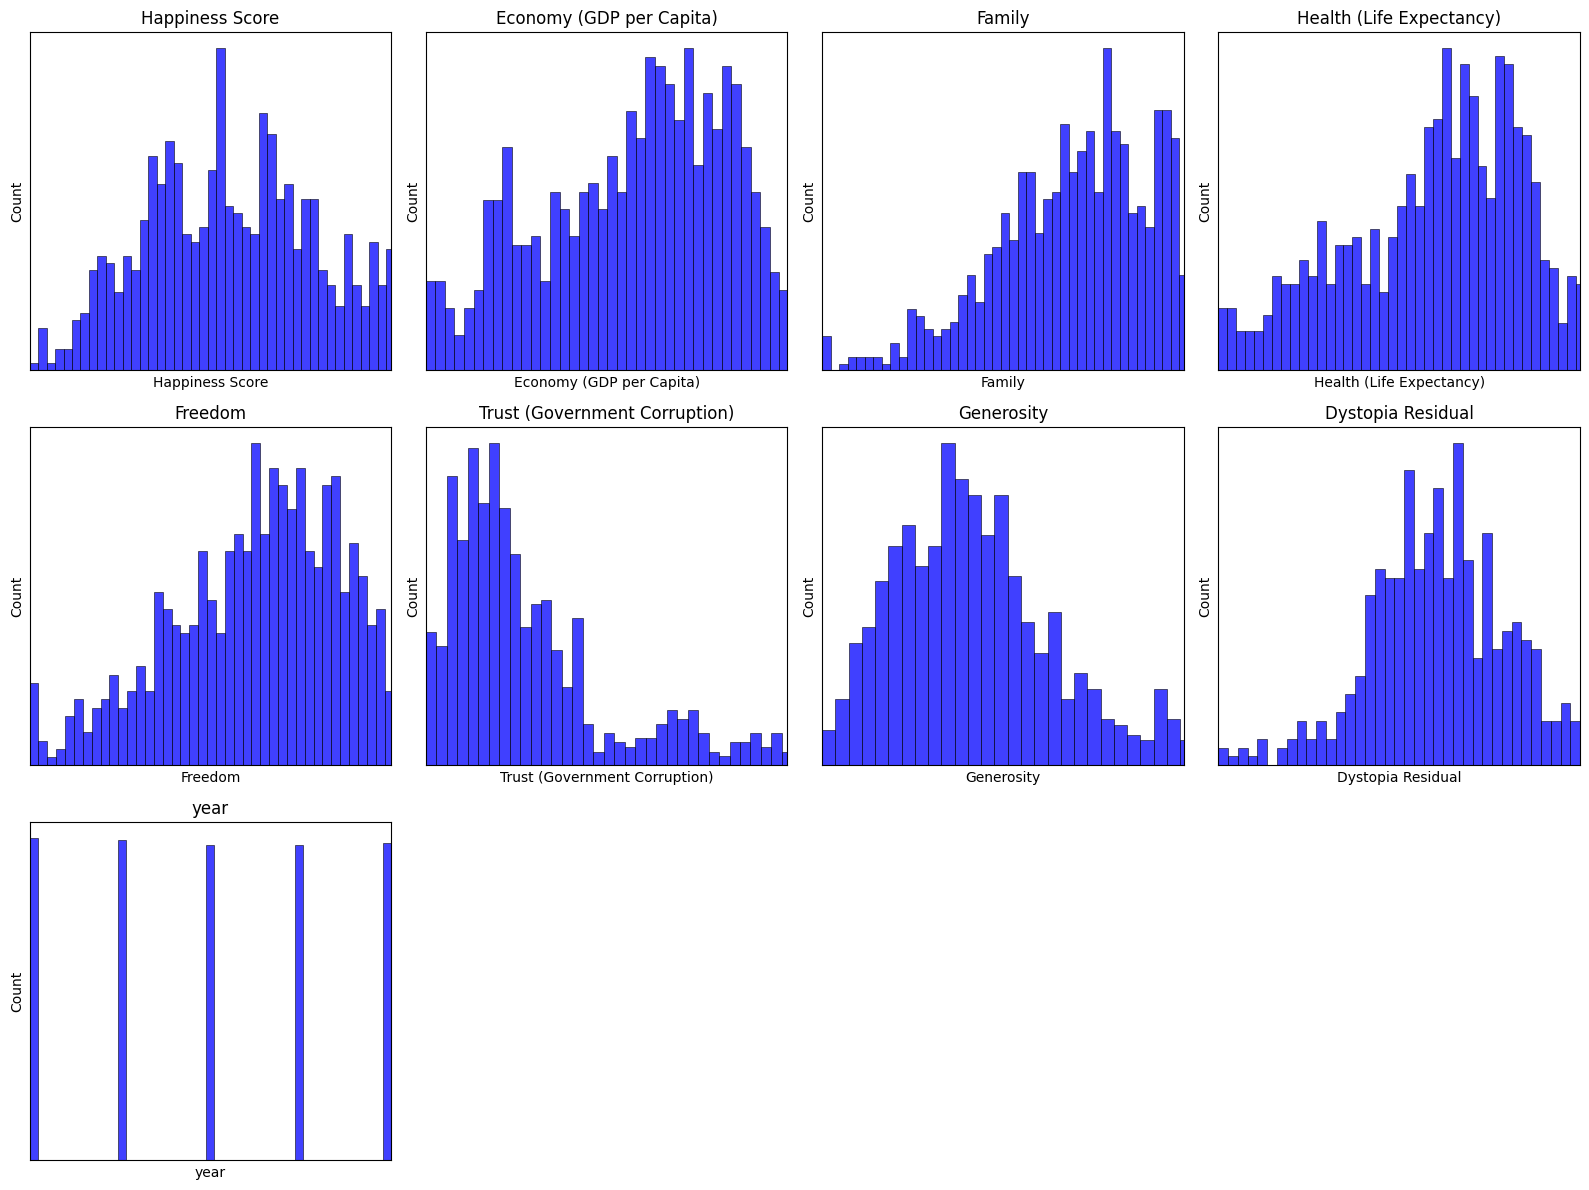

In [386]:
numerical = df.select_dtypes('number')

n_cols = 4
n_rows = ceil(numerical.shape[1] / n_cols)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 4, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column], bins=45, ax=axes[i], color='blue', kde=False)
    axes[i].set_title(column)
    axes[i].set_yticks([])  
    axes[i].set_xticks([])  

    axes[i].set_xlim([numerical[column].min(), numerical[column].quantile(0.98)])

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

The Happiness Score appears to follow a normal distribution, which suggests that it could be well-suited for predictive modeling. In our regression analysis phase, we can utilize a classic linear regression model to predict happiness levels effectively, leveraging the relationships observed in the data. This linear approach allows us to understand how various factors contribute to the overall happiness scores across different countries.


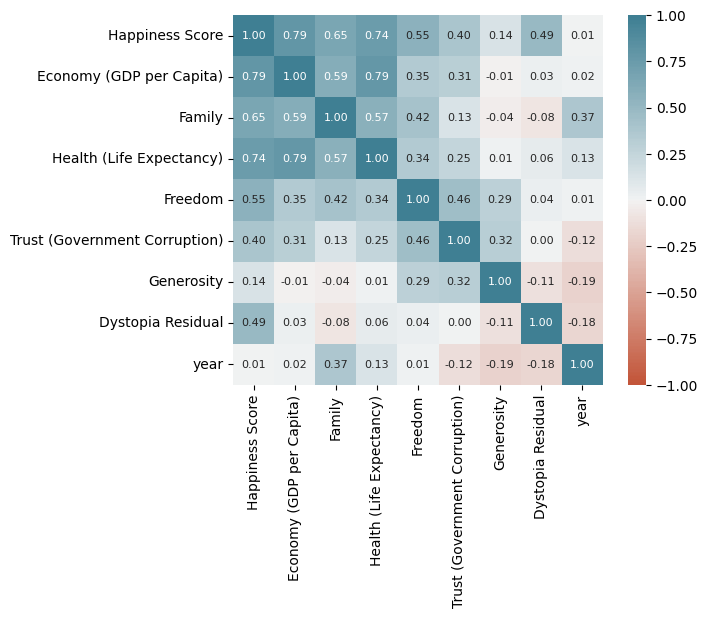

In [387]:
correlation = numerical.corr()
ax = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f',
    annot_kws={"size": 8}
)

### Heatmap Interpretation
1. **Happiness Score**:
   - **Economy (GDP per Capita)** shows a strong positive correlation with Happiness Score (**0.79**), indicating that wealthier countries tend to have higher happiness levels.
   - **Health (Life Expectancy)** also has a significant positive correlation (**0.74**), highlighting the importance of life expectancy in contributing to happiness.
   - **Family** has a moderate correlation (**0.65**), suggesting that family relationships are important for happiness, but not as much as economic or health factors.
   - **Freedom** has a positive correlation (**0.55**), showing that personal freedom is also a relevant factor for happiness, although to a lesser extent.

2. **Other Strong Correlations**:
   - **Economy (GDP per Capita)** and **Health (Life Expectancy)** have a high correlation (**0.78**), indicating that wealthier countries tend to have better health outcomes.
   - **Freedom** and **Trust (Government Corruption)** show a moderate correlation (**0.46**), suggesting that countries with more freedom tend to have less perceived corruption.


## Data visualization

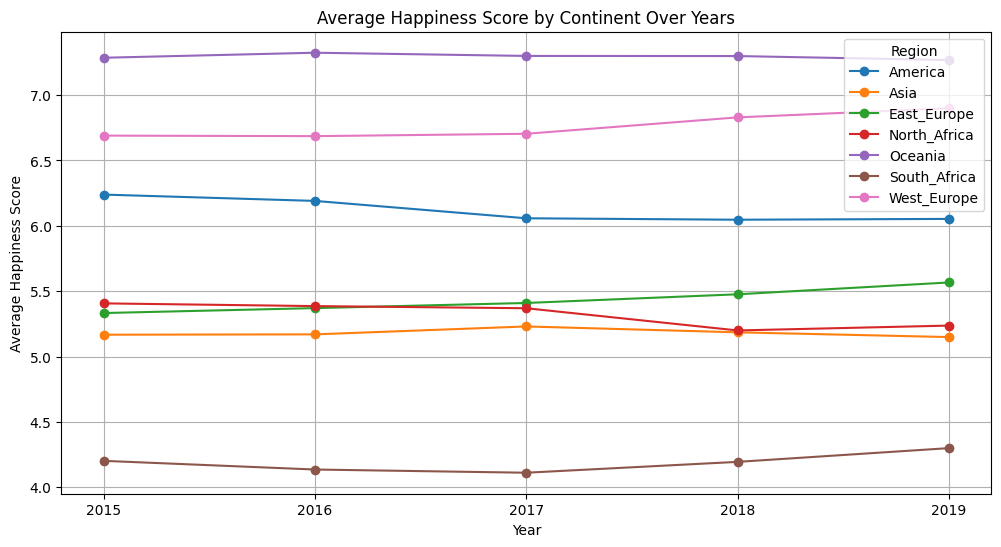

In [388]:
average_per_continent = df.groupby(['year', 'Region'])['Happiness Score'].mean().reset_index()

plt.figure(figsize=(12, 6))
for region in average_per_continent['Region'].unique():
    subset = average_per_continent[average_per_continent['Region'] == region]
    plt.plot(subset['year'], subset['Happiness Score'], marker='o', label=region)

plt.title('Average Happiness Score by Continent Over Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.legend(title='Region')
plt.grid()
plt.xticks(subset['year'].unique())  # Asegura que se muestren todos los años
plt.show()


The graph illustrates the average Happiness Score by continent over the years. Notably, Oceania consistently shows a higher average happiness score compared to other regions. However, this could be attributed to the limited number of countries represented from Oceania in this dataset. In contrast, Africa exhibits the lowest average happiness scores, indicating significant challenges related to well-being in that region. These findings highlight the disparities in happiness levels across different continents and warrant further investigation into the underlying factors influencing these trends.


### 🔄 Renaming Columns for Model Training

Before training the model, we standardized the column names in the dataset for consistency and clarity. The following renaming was performed:

- **Happiness Score** was renamed to **Score**
- **Economy (GDP per Capita)** was renamed to **Economy**
- **Health (Life Expectancy)** was renamed to **Health**
- **Trust (Government Corruption)** was renamed to **Trust**
- **Dystopia Residual** was renamed to **Dystopia**

These changes will help streamline the modeling process and make the data easier to work with during analysis.


In [ ]:
df.rename(columns={
    'Happiness Score: 'Score',
    'Economy (GDP per Capita)': 'Economy',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Trust',
    'Dystopia Residual' : 'Dystopia'
}, inplace=True)


### 🔍 Feature Selection: Creating Dummy Variables

To prepare the dataset for modeling, we first created dummy variables for the **Region** column. This transformation allows us to convert categorical variables into a format that can be easily used in machine learning algorithms.

We used the `pd.get_dummies()` function, specifying `drop_first=True` to avoid the dummy variable trap by dropping the first category. This approach ensures that we only include necessary variables while maintaining the interpretability of the model.

Additionally, we dropped the **Country** column from the dataset, as it is not needed for our predictive modeling. By removing this column, we focus on the features that contribute to our analysis of happiness scores.


In [391]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True, dtype=int)
df.drop(columns="Country", inplace=True)


To enhance our dataset, we trained a Linear Regression model using data from the years 2015 and 2016. The goal was to predict the **Dystopia** scores for the subsequent years based on various predictor variables.

We created a training dataset by dropping any rows with missing values in the **Dystopia** column, which provided a complete dataset for model training. After fitting the model to the training data, we used it to predict **Dystopia** values for the incomplete data from later years.

This method allowed us to impute missing **Dystopia** scores, adding a valuable feature to our dataset that may offer deeper insights into global happiness levels.


In [393]:
complete_data = df.dropna(subset=['Dystopia'])
incomplete_data = df[df['Dystopia'].isna()]

predictors = [
    'Economy', 
    'Family', 
    'Health', 
    'Freedom', 
    'Trust', 
    'Generosity', 
    'year', 
    'Region_Asia', 
    'Region_East_Europe', 
    'Region_North_Africa', 
    'Region_Oceania',
    'Region_South_Africa',
    'Region_West_Europe'
]

X_train = complete_data[predictors]
y_train = complete_data['Dystopia']

model = KNeighborsRegressor(
    n_neighbors=4,  
    leaf_size=12,
    weights='distance'                 
)

model.fit(X_train, y_train)

X_missing = incomplete_data[predictors]
predicted_values = model.predict(X_missing)

df.loc[df['Dystopia'].isna(), 'Dystopia'] = predicted_values


### Aprendizaje supervisado

We have initiated the supervised learning phase of our analysis. The first step involved separating the features from the target variable. The target variable is the **Score** (Happiness Score), while the features include all other relevant variables in the dataset.


In [394]:

X = df.drop(['Score'], axis=1)
y = df['Score']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



### 🛠️ Model Preparation

In this stage, we prepared a variety of regression models to determine which one best predicts our target variable, the **Score** (Happiness Score). The following models were initialized for evaluation:

- **Linear Regression (LR)**
- **Ridge Regression**
- **Lasso Regression**
- **Decision Tree Regressor (DT)**
- **Random Forest Regressor (RF)**
- **Gradient Boosting Regressor (GB)**
- **AdaBoost Regressor (AB)**
- **Support Vector Regressor (SVR)**
- **K-Neighbors Regressor (KNN)**
- **XGBoost Regressor (XGB)**

These models will be trained and evaluated to identify the one that yields the best predictive performance for the happiness score.


In [395]:
model_LR = LinearRegression()
model_Ridge = Ridge(random_state=0)
model_Lasso = Lasso(random_state=0)
model_DT = DecisionTreeRegressor(random_state=0)
model_RF = RandomForestRegressor(random_state=0)
model_GB = GradientBoostingRegressor(random_state=0)
model_AB = AdaBoostRegressor(random_state=0)
model_SVR = SVR()
model_KNN = KNeighborsRegressor()
model_XGB = XGBRegressor(random_state=0)

In [396]:
model_LR.fit(X_train, y_train)
model_Ridge.fit(X_train, y_train)
model_Lasso.fit(X_train, y_train)
model_DT.fit(X_train, y_train)
model_RF.fit(X_train, y_train)
model_GB.fit(X_train, y_train)
model_AB.fit(X_train, y_train)
model_SVR.fit(X_train, y_train)
model_KNN.fit(X_train, y_train)
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [397]:
y_pred_LR = model_LR.predict(X_test)
y_pred_Ridge = model_Ridge.predict(X_test)
y_pred_Lasso = model_Lasso.predict(X_test)
y_pred_DT = model_DT.predict(X_test)
y_pred_RF = model_RF.predict(X_test)
y_pred_GB = model_GB.predict(X_test)
y_pred_AB = model_AB.predict(X_test)
y_pred_SVR = model_SVR.predict(X_test)
y_pred_KNN = model_KNN.predict(X_test)
y_pred_XGB = model_XGB.predict(X_test)

print("Linear Regression, R^2: ", r2_score(y_test, y_pred_LR))
print("Ridge, R^2: ", r2_score(y_test, y_pred_Ridge))
print("Decision Tree, R^2: ", r2_score(y_test, y_pred_DT))
print("Random Forest, R^2: ", r2_score(y_test, y_pred_RF))
print("Gradient Boosting, R^2: ", r2_score(y_test, y_pred_GB))
print("AdaBoost, R^2: ", r2_score(y_test, y_pred_AB))
print("KNN, R^2: ", r2_score(y_test, y_pred_KNN))
print("XGBoost, R^2: ", r2_score(y_test, y_pred_XGB))



Linear Regression, R^2:  0.9500140155759124
Ridge, R^2:  0.9494849018920475
Decision Tree, R^2:  0.8004264906737175
Random Forest, R^2:  0.9199492775074501
Gradient Boosting, R^2:  0.9313105763893788
AdaBoost, R^2:  0.8820337122760447
KNN, R^2:  0.8257880043205216
XGBoost, R^2:  0.915373588943586


From the results, both Linear Regression and Ridge Regression achieved the highest R² scores, indicating their strong ability to explain the variance in the Happiness Score. However, we will choose **Linear Regression** for our final model due to its simplicity and lightweight nature. 

Using Linear Regression offers several benefits:
- **Interpretability:** The model coefficients are easy to understand, making it straightforward to explain how different features impact the target variable.
- **Efficiency:** It requires fewer computational resources compared to more complex models, making it faster for both training and prediction.
- **Performance:** Given its high R² score, it demonstrates strong predictive capability, making it suitable for our analysis.

Overall, the decision to use Linear Regression aligns with our objectives of creating a reliable and efficient predictive model for happiness scores.

### 📈 Model Conclusions

After evaluating the performance of our models, we observed that the polynomial regression approach yielded an impressive precision of **95%**.

- **Best Model**: Linear Model
- **Best R²**: 0.95

This model explains **95%** of the variance in the Happiness Score, indicating a strong fit and a robust predictive capability. This high level of explanatory power suggests that our selected features effectively capture the underlying factors influencing happiness levels across countries.


In [398]:
joblib.dump(model_LR, '../model_training/polymodel.pkl')

['../model_training/polymodel.pkl']